In [183]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from matplotlib.colors import ListedColormap

import re

In [184]:
import neurokit2 as nk

In [185]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.8
plt.rcParams['grid.linestyle'] = 'dotted'
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['figure.figsize'] = (4.845, 3.135)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['mathtext.default']='regular'

In [427]:
colors = ListedColormap(sns.color_palette('deep')).colors

arousal_color = colors[0]
valence_color = colors[1]
bg_color = ListedColormap(sns.color_palette('Greys', 4)).colors[0]
signal_color = ListedColormap(sns.color_palette('Greens', 4)).colors[3]

In [227]:
def rsp_rate(rsp):
    cleaned = nk.rsp_clean(rsp, sampling_rate=1000)
    df, peaks_dict = nk.rsp_peaks(cleaned) 
    info = nk.rsp_fixpeaks(peaks_dict)
    formatted = nk.signal_formatpeaks(info, desired_length=len(cleaned), peak_indices=info["RSP_Peaks"])
    rsp_rate = nk.rsp_rate(cleaned, peaks_dict, sampling_rate=1000, )
    return rsp_rate
    # Visualize
#     nk.signal_plot(X, sampling_rate=1000) # Visualize
#     nk.signal_plot(pd.DataFrame({"RSP_Raw": X['rsp'], "RSP_Clean": cleaned}), sampling_rate=1000, subplots=True)
    # nk.signal_plot(rsp_rate, sampling_rate=1000)
#     candidate_peaks = nk.events_plot(peaks_dict['RSP_Peaks'], cleaned)
# fixed_peaks = nk.events_plot(info['RSP_Peaks'], cleaned)
    # plt.ylabel('Breaths Per Minute')
#     rrv = nk.rsp_rrv(rsp_rate, info, sampling_rate=1000, show=True)

## scenario 1

training set and test set have the same subjects and videos

In [186]:
path_prefix = '../'
class S1():
    def __init__(self):
        filenames = sorted(os.listdir(os.path.join(path_prefix, f'data/scenario_1/train/physiology')),
                           key=lambda s: (int(re.findall(r'(?<=sub_)\d+', s)[0]), int(re.findall(r'(?<=vid_)\d+', s)[0])))
        self.subs = list(set([int(re.findall(r'(?<=sub_)\d+', s)[0]) for s in filenames]))
        self.vids = list(set([int(re.findall(r'(?<=vid_)\d+', s)[0]) for s in filenames]))
        self.keys = ['ecg',' bvp', 'gsr', 'rsp', 'skt', 'emg_zygo', 'emg_coru', 'emg_trap']
    
    def train_data(self, sub: int, vid: int, features):
        if len(features) == 0:
            features = self.keys
        return pd.read_csv(os.path.join(path_prefix, f'data/scenario_1/train/physiology', f'sub_{sub}_vid_{vid}.csv'), index_col="time")[features], \
            pd.read_csv(os.path.join(path_prefix, f'data/scenario_1/train/annotations', f'sub_{sub}_vid_{vid}.csv'), index_col="time")
    
    def test_data(self, sub: int, vid: int, features):
        if len(features) == 0:
            features = self.keys
        return pd.read_csv(os.path.join(path_prefix, f'data/scenario_1/test/physiology', f'sub_{sub}_vid_{vid}.csv'), index_col="time")[features], \
            pd.read_csv(os.path.join(path_prefix, f'data/scenario_1/test/annotations', f'sub_{sub}_vid_{vid}.csv'), index_col="time")

In [187]:
s1 = S1()

In [188]:
np.array(s1.subs), np.array(s1.vids)

(array([ 1,  4,  6,  7,  8,  9, 11, 12, 13, 14, 17, 18, 19, 20, 22, 26, 28,
        29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 45]),
 array([ 1,  9, 10, 11, 13, 14, 18, 20]))

In [246]:
X, y = s1.train_data(1, 1, ['rsp'])
rsp = X['rsp']

In [418]:
# Process rsp
rsp_signals, info = nk.rsp_process(rsp, sampling_rate=1000)
# nk.rsp_plot(rsp_signals, sampling_rate=1000)
# nk.rsp_intervalrelated(rsp_signals)

In [419]:
rsp_signals

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_RVT,RSP_Phase,RSP_Phase_Completion,RSP_Symmetry_PeakTrough,RSP_Symmetry_RiseDecay,RSP_Peaks,RSP_Troughs
0,32.731,-0.194696,1.700939,20.079454,0.361914,NaN,0.0,0.701402,0.401285,0,0
1,32.731,-0.194073,1.700939,20.079454,0.361915,NaN,0.0,0.701402,0.401285,0,0
2,32.721,-0.193438,1.700939,20.079454,0.361916,NaN,0.0,0.701402,0.401285,0,0
3,32.711,-0.192792,1.700939,20.079454,0.361916,NaN,0.0,0.701402,0.401285,0,0
4,32.721,-0.192133,1.700939,20.079454,0.361917,NaN,0.0,0.701402,0.401285,0,0
...,...,...,...,...,...,...,...,...,...,...,...
103046,34.221,-0.000021,0.913779,28.999517,0.340494,NaN,0.0,0.692943,0.605123,0,0
103047,34.221,-0.000017,0.913779,28.999517,0.340462,NaN,0.0,0.692943,0.605123,0,0
103048,34.183,-0.000015,0.913779,28.999517,0.340430,NaN,0.0,0.692943,0.605123,0,0
103049,34.182,-0.000012,0.913779,28.999517,0.340398,NaN,0.0,0.692943,0.605123,0,0


In [422]:
epochs = nk.epochs_create(rsp_signals[:-1], events=np.arange(0, rsp_signals[:-1].index[-1] - 1000, 500),
                          sampling_rate=1000,
                          epochs_end=1)

In [423]:
rsp_analyzed = nk.rsp_analyze(epochs)
rsp_analyzed

,Label,Event_Onset,RSP_Rate_Baseline,RSP_Rate_Max,RSP_Rate_Min,RSP_Rate_Mean,RSP_Rate_SD,RSP_Rate_Max_Time,RSP_Rate_Min_Time,RSP_Rate_Trend_Linear,...,RSP_Amplitude_Baseline,RSP_Amplitude_Max,RSP_Amplitude_Min,RSP_Amplitude_MeanRaw,RSP_Amplitude_Mean,RSP_Amplitude_SD,RSP_Phase,RSP_Phase_Completion,RSP_RVT_Baseline,RSP_RVT_Mean
1,1,0,20.079454,0.000000,0.0,-3.552714e-15,3.552714e-15,0.001001,0.001001,0.000000,...,1.700939,0.0,0.0,1.700939,-2.220446e-16,2.220446e-16,NaN,0.0,0.361914,0.007737
2,2,500,20.079454,0.000000,0.0,-3.552714e-15,3.552714e-15,0.001001,0.001001,0.000000,...,1.700939,0.0,0.0,1.700939,-2.220446e-16,2.220446e-16,NaN,0.0,0.367886,0.018067
3,3,1000,20.079454,0.000000,0.0,-3.552714e-15,3.552714e-15,0.001001,0.001001,0.000000,...,1.700939,0.0,0.0,1.700939,-2.220446e-16,2.220446e-16,NaN,0.0,0.384440,0.026954
4,4,1500,20.079454,0.000000,0.0,-3.552714e-15,3.552714e-15,0.001001,0.001001,0.000000,...,1.700939,0.0,0.0,1.700939,-2.220446e-16,2.220446e-16,NaN,0.0,0.410100,0.034572
5,5,2000,20.079454,0.001299,0.0,9.627830e-05,2.572657e-04,1.000000,0.001001,-0.001503,...,1.700939,0.0,0.0,1.700939,-2.220446e-16,2.220446e-16,NaN,0.0,0.443552,0.040902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,201,100000,28.999517,0.000000,0.0,0.000000e+00,0.000000e+00,0.001001,0.001001,0.000000,...,0.913779,0.0,0.0,0.913779,-1.110223e-16,1.110223e-16,NaN,0.0,0.381230,0.077461
202,202,100500,28.999517,0.000000,0.0,0.000000e+00,0.000000e+00,0.001001,0.001001,0.000000,...,0.913779,0.0,0.0,0.913779,-1.110223e-16,1.110223e-16,NaN,0.0,0.466846,0.028125
203,203,101000,28.999517,0.000000,0.0,0.000000e+00,0.000000e+00,0.001001,0.001001,0.000000,...,0.913779,0.0,0.0,0.913779,-1.110223e-16,1.110223e-16,NaN,0.0,0.504331,-0.023763
204,204,101500,28.999517,0.000000,0.0,0.000000e+00,0.000000e+00,0.001001,0.001001,0.000000,...,0.913779,0.0,0.0,0.913779,-1.110223e-16,1.110223e-16,NaN,0.0,0.486527,-0.053733


In [366]:
rsp_analyzed.columns

Index(['Label', 'Event_Onset', 'RSP_Rate_Baseline', 'RSP_Rate_Max',
       'RSP_Rate_Min', 'RSP_Rate_Mean', 'RSP_Rate_SD', 'RSP_Rate_Max_Time',
       'RSP_Rate_Min_Time', 'RSP_Rate_Trend_Linear',
       'RSP_Rate_Trend_Quadratic', 'RSP_Rate_Trend_R2',
       'RSP_Amplitude_Baseline', 'RSP_Amplitude_Max', 'RSP_Amplitude_Min',
       'RSP_Amplitude_MeanRaw', 'RSP_Amplitude_Mean', 'RSP_Amplitude_SD',
       'RSP_Phase', 'RSP_Phase_Completion', 'RSP_RVT_Baseline',
       'RSP_RVT_Mean'],
      dtype='object')

In [371]:
features = ['RSP_Rate_Baseline', 'RSP_Rate_Max', 'RSP_Rate_Min', 'RSP_Rate_Mean', 'RSP_Rate_SD', 
            'RSP_Rate_Max_Time', 'RSP_Rate_Min_Time', 'RSP_Rate_Trend_Linear', 'RSP_Rate_Trend_Quadratic', 
            'RSP_Rate_Trend_R2', 'RSP_Amplitude_Baseline', 'RSP_Amplitude_Max', 'RSP_Amplitude_Min', 
            'RSP_Amplitude_MeanRaw', 'RSP_Amplitude_Mean', 'RSP_Amplitude_SD',
            'RSP_Phase', 'RSP_Phase_Completion', 'RSP_RVT_Baseline', 'RSP_RVT_Mean']

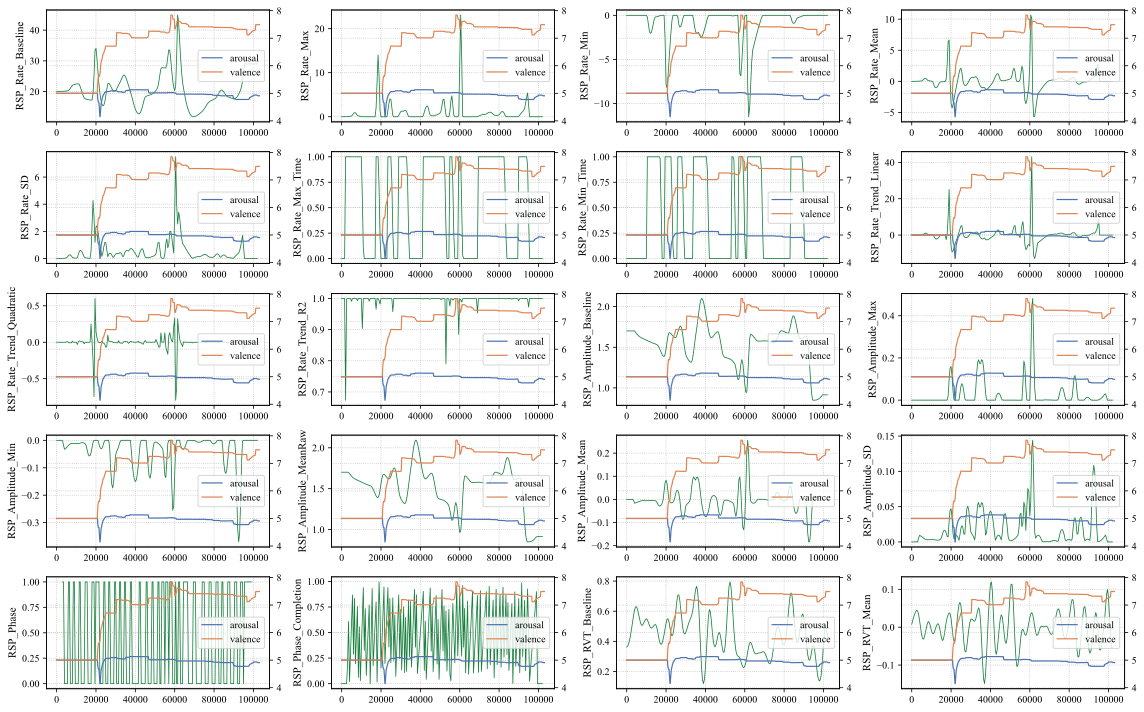

In [430]:
width_per_figure = 4
height_per_figure = 2
n_row = 5
n_column = 4
fig, axes = plt.subplots(n_row, n_column, figsize=(width_per_figure * n_column, height_per_figure * n_row))
axes = axes.flatten()
for i, feature in enumerate(features):
    axes[i].set_ylabel(f'{feature}')
    axes[i].plot(rsp_analyzed['Event_Onset'], rsp_analyzed[feature].to_numpy(), color=signal_color, linewidth=0.8)
    ax2 = plt.twinx(axes[i])
    ax2.plot(y['arousal'], label='arousal', color=arousal_color, linewidth=1.2)
    ax2.plot(y['valence'], label='valence', color=valence_color, linewidth=1.2)
#     ax2.set_ylabel('Arousal and Valence')
    plt.legend()
plt.tight_layout();

In [228]:
feature = 'rsp'

s1 = S1()
n_vids = len(s1.vids)
n_subs = len(s1.subs)

for i, sub in enumerate(s1.subs):
    fig = plt.figure(figsize=(18, 4 * n_vids))
    fig.patch.set_facecolor('white')
    for j, vid in enumerate(s1.vids):
        train_physiology, train_annotations = s1.train_data(sub, vid, [feature])
        test_physiology, test_annotations = s1.test_data(sub, vid, [feature])

        gap = train_physiology.index[-1] + 20000
        ticks = list(range(0, train_annotations.index[-1] + 1, 20000)) + list(range(gap, gap + test_annotations.index[-1] + 1, 20000))
        labels = list(range(0, train_annotations.index[-1] + 1, 20000)) + list(range(0, test_annotations.index[-1] + 1, 20000))
        
        rsp_rate_train = rsp_rate(train_physiology[feature])
        rsp_rate_test = rsp_rate(test_physiology[feature])

        
        ax = plt.subplot(n_vids, 1, j + 1)
        plt.plot(train_physiology.index, rsp_rate_train, color=signal_color)
        plt.axvspan(train_physiology.index[0], train_annotations.index[-1], color=bg_color, alpha=0.6)

        plt.plot(test_physiology.index + gap, rsp_rate_test, color=signal_color)
        plt.axvspan(test_annotations.index[0] + gap, test_annotations.index[-1] + gap, color=bg_color, alpha=0.6)

        plt.xlim(left=train_physiology.index[0], right=test_physiology.index[-1] + gap)

        plt.xticks(ticks=ticks, labels=labels)
        plt.title(f"Scenario 1: Subject {sub} Video {vid}")
        plt.ylabel(f"Signal value ({feature} rate, Breaths Per Minute)")
        plt.xlabel("Time")

        ax2 = ax.twinx()
        ax2.set_ylabel('Annotation value')
        ax2.plot(train_annotations.index, train_annotations['arousal'], label='arousal - train', color=arousal_color)
        ax2.plot(train_annotations.index, train_annotations['valence'], label='valence - train', color=valence_color)
        #     ax2.plot(test_annotations.index + gap, test_annotations['arousal'], label='arousal - test')
        #     ax2.plot(test_annotations.index + gap, test_annotations['valence'], label='valence - test')
        plt.legend()

    plt.tight_layout()
    plt.savefig(f'../figures/scenario_1/rsp/sub_{sub}.pdf', format='pdf', dpi=300)
    plt.close();
#     plt.show()

## scenario 2

In [230]:
path_prefix = '../'
class S2():
    def __init__(self):
        self.fold = [0, 1, 2, 3, 4]
        
        self.train_subs = [] # (5, x)
        self.test_subs = [] # (5, x)
        self.vids = [] # (x)
        
        for i in self.fold:
            filenames = os.listdir(os.path.join(path_prefix, f'data/scenario_2/fold_{i}/train/physiology'))
            self.train_subs.append(sorted(list(set([int(re.findall(r'(?<=sub_)\d+', s)[0]) for s in filenames]))))
            if self.vids == []:
                self.vids = sorted(list(set([int(re.findall(r'(?<=vid_)\d+', s)[0]) for s in filenames])))
            
            filenames = os.listdir(os.path.join(path_prefix, f'data/scenario_2/fold_{i}/test/physiology'))
            self.test_subs.append(sorted(list(set([int(re.findall(r'(?<=sub_)\d+', s)[0]) for s in filenames]))))

        self.keys = ['ecg',' bvp', 'gsr', 'rsp', 'skt', 'emg_zygo', 'emg_coru', 'emg_trap']
    
    def train_data(self, fold: int, sub: int, vid: int, features=[]):
        if len(features) == 0:
            features = self.keys
        return pd.read_csv(os.path.join(path_prefix, f'data/scenario_2/fold_{fold}/train/physiology', f'sub_{sub}_vid_{vid}.csv'), index_col="time")[features], \
            pd.read_csv(os.path.join(path_prefix, f'data/scenario_2/fold_{fold}/train/annotations', f'sub_{sub}_vid_{vid}.csv'), index_col="time")
    
    def test_data(self, fold: int, sub: int, vid: int, features=[]):
        if len(features) == 0:
            features = self.keys
        return pd.read_csv(os.path.join(path_prefix, f'data/scenario_2/fold_{fold}/test/physiology', f'sub_{sub}_vid_{vid}.csv'), index_col="time")[features], \
            pd.read_csv(os.path.join(path_prefix, f'data/scenario_2/fold_{fold}/test/annotations', f'sub_{sub}_vid_{vid}.csv'), index_col="time")

In [234]:
s2 = S2()

In [235]:
feature = 'rsp'

s2 = S2()
n_vids = len(s2.vids)

# for fold in s2.fold:

for i, vid in enumerate(s2.vids):
    fig = plt.figure(figsize=(10 * 5, 5 * 30)) # (5 fold, 30 subs for each fold)
    fig.patch.set_facecolor('white')
    for fold in s2.fold:
        n_subs = len(s2.train_subs[fold]) + len(s2.test_subs[fold])
        for j, sub in enumerate(s2.train_subs[fold] + s2.test_subs[fold]):
            ax = plt.subplot(30, 5, fold + j * 5 + 1)
            
            if sub in s2.train_subs[fold]:
                mode = 'train'
                physiology, annotations = s2.train_data(fold, sub, vid, [feature])
            else:
                mode = 'test'
                physiology, annotations = s2.test_data(fold, sub, vid, [feature])
            y = rsp_rate(physiology['rsp'])
            plt.plot(physiology.index, y, color=signal_color)
            plt.axvspan(annotations.index[0], annotations.index[-1], color=bg_color, alpha=0.6)

            plt.xlim(left=physiology.index[0], right=physiology.index[-1])

            plt.title(f"Scenario 2: Fold {fold} - Subject {sub} - Video {vid} - ({mode})")
            plt.ylabel(f"Signal value ({feature} rate, Breaths Per Minute)")
            plt.xlabel("Time")

            ax2 = ax.twinx()
            ax2.set_ylabel('Annotation value')
            ax2.plot(annotations.index, annotations['arousal'], label='arousal - train', color=arousal_color)
            ax2.plot(annotations.index, annotations['valence'], label='valence - train', color=valence_color)
            plt.legend()

    plt.tight_layout()
    plt.savefig(f'../figures/scenario_2/rsp/vid_{vid}.pdf', format='pdf', dpi=300)
    plt.close();
    #     plt.show()

/home/kksix/.local/lib/python3.10/site-packages/neurokit2/signal/signal_period.py:68: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


## scenario 3

In [236]:
path_prefix = '../'
class S3():
    def __init__(self):
        self.fold = [0, 1, 2, 3]
        
        self.train_vids = []
        self.test_vids = []
        self.subs = []
        
        for i in self.fold:
            filenames = os.listdir(os.path.join(path_prefix, f'data/scenario_3/fold_{i}/train/physiology'))
            self.train_vids.append(sorted(list(set([int(re.findall(r'(?<=vid_)\d+', s)[0]) for s in filenames]))))
            if self.subs == []:
                self.subs = sorted(list(set([int(re.findall(r'(?<=sub_)\d+', s)[0]) for s in filenames])))
            
            filenames = os.listdir(os.path.join(path_prefix, f'data/scenario_3/fold_{i}/test/physiology'))
            self.test_vids.append(sorted(list(set([int(re.findall(r'(?<=vid_)\d+', s)[0]) for s in filenames]))))

        self.keys = ['ecg',' bvp', 'gsr', 'rsp', 'skt', 'emg_zygo', 'emg_coru', 'emg_trap']
    
    def train_data(self, fold: int, sub: int, vid: int, features):
        if len(features) == 0:
            features = self.keys
        return pd.read_csv(os.path.join(path_prefix, f'data/scenario_3/fold_{fold}/train/physiology', f'sub_{sub}_vid_{vid}.csv'), index_col="time")[features], \
            pd.read_csv(os.path.join(path_prefix, f'data/scenario_3/fold_{fold}/train/annotations', f'sub_{sub}_vid_{vid}.csv'), index_col="time")
    
    def test_data(self, fold: int, sub: int, vid: int, features):
        if len(features) == 0:
            features = self.keys
        return pd.read_csv(os.path.join(path_prefix, f'data/scenario_3/fold_{fold}/test/physiology', f'sub_{sub}_vid_{vid}.csv'), index_col="time")[features], \
            pd.read_csv(os.path.join(path_prefix, f'data/scenario_3/fold_{fold}/test/annotations', f'sub_{sub}_vid_{vid}.csv'), index_col="time")

In [237]:
s3 = S3()
# s3.train_vids
# s3.test_vids
# s3.subs

In [238]:
feature = 'rsp'

s3 = S3()
for fold in s3.fold:
    fig = plt.figure(figsize=(10 * 8, 5 * 30))
    fig.patch.set_facecolor('white')
    for i, sub in enumerate(s3.subs):
        for j, vid in enumerate(s3.train_vids[fold]+s3.test_vids[fold]):  
            ax = plt.subplot(30, 8, i * 8 + j + 1)
            if vid in s3.train_vids[fold]:
                mode = 'train'
                physiology, annotations = s3.train_data(fold, sub, vid, [feature])
            else:
                mode = 'test'
                physiology, annotations = s3.test_data(fold, sub, vid, [feature])
            y = rsp_rate(physiology['rsp'])
            plt.plot(physiology.index, y, color=signal_color)
            plt.axvspan(annotations.index[0], annotations.index[-1], color=bg_color, alpha=0.6)

            plt.xlim(left=physiology.index[0], right=physiology.index[-1])

            plt.title(f"Scenario 3: Fold {fold} - Subject {sub} - Video {vid} - ({mode})")
            plt.ylabel(f"Signal value ({feature} rate, Breaths Per Minute)")
            plt.xlabel("Time")

            ax2 = ax.twinx()
            ax2.set_ylabel('Annotation value')
            ax2.plot(annotations.index, annotations['arousal'], label='arousal - train', color=arousal_color)
            ax2.plot(annotations.index, annotations['valence'], label='valence - train', color=valence_color)
            plt.legend()

    plt.tight_layout()
    plt.savefig(f'../figures/scenario_3/rsp/fold_{fold}.pdf', format='pdf', dpi=300)
    plt.close();
    #     plt.show()

/home/kksix/.local/lib/python3.10/site-packages/neurokit2/signal/signal_period.py:68: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


## scenario 4

In [239]:
path_prefix = '../'
class S4():
    def __init__(self):
        self.fold = [0, 1]
        
        self.train_vids = []
        self.test_vids = []
        self.subs = []
        
        for i in self.fold:
            filenames = os.listdir(os.path.join(path_prefix, f'data/scenario_4/fold_{i}/train/physiology'))
            self.train_vids.append(sorted(list(set([int(re.findall(r'(?<=vid_)\d+', s)[0]) for s in filenames]))))
            if self.subs == []:
                self.subs = sorted(list(set([int(re.findall(r'(?<=sub_)\d+', s)[0]) for s in filenames])))
            
            filenames = os.listdir(os.path.join(path_prefix, f'data/scenario_4/fold_{i}/test/physiology'))
            self.test_vids.append(sorted(list(set([int(re.findall(r'(?<=vid_)\d+', s)[0]) for s in filenames]))))

        self.keys = ['ecg',' bvp', 'gsr', 'rsp', 'skt', 'emg_zygo', 'emg_coru', 'emg_trap']
    
    def train_data(self, fold: int, sub: int, vid: int, features):
        if len(features) == 0:
            features = self.keys
        return pd.read_csv(os.path.join(path_prefix, f'data/scenario_4/fold_{fold}/train/physiology', f'sub_{sub}_vid_{vid}.csv'), index_col="time")[features], \
            pd.read_csv(os.path.join(path_prefix, f'data/scenario_4/fold_{fold}/train/annotations', f'sub_{sub}_vid_{vid}.csv'), index_col="time")
    
    def test_data(self, fold: int, sub: int, vid: int, features):
        if len(features) == 0:
            features = self.keys
        return pd.read_csv(os.path.join(path_prefix, f'data/scenario_4/fold_{fold}/test/physiology', f'sub_{sub}_vid_{vid}.csv'), index_col="time")[features], \
            pd.read_csv(os.path.join(path_prefix, f'data/scenario_4/fold_{fold}/test/annotations', f'sub_{sub}_vid_{vid}.csv'), index_col="time")

In [240]:
s4 = S4()
s4.train_vids, s4.test_vids

([[3, 16, 19, 20], [0, 9, 12, 15]], [[0, 9, 12, 15], [3, 16, 19, 20]])

In [241]:
feature = 'rsp'

s4 = S4()
fig = plt.figure(figsize=(10 * 8, 5 * 30))
fig.patch.set_facecolor('white')

for fold in s4.fold:
    for i in range(4): # 4 group vids (train, test)
        for j, sub in enumerate(s4.subs):
            train_physiology, train_annotations = s4.train_data(fold, sub, s4.train_vids[fold][i], [feature])
            test_physiology, test_annotations = s4.test_data(fold, sub, s4.test_vids[fold][i], [feature])
            
            rsp_rate_train = rsp_rate(train_physiology[feature])
            rsp_rate_test = rsp_rate(test_physiology[feature])
        
            gap = train_physiology.index[-1] + 20000
            ticks = list(range(0, train_annotations.index[-1] + 1, 20000)) + list(range(gap, gap + test_annotations.index[-1] + 1, 20000))
            labels = list(range(0, train_annotations.index[-1] + 1, 20000)) + list(range(0, test_annotations.index[-1] + 1, 20000))

            ax = plt.subplot(30, 8, fold * 4 + i + j * 8 + 1)
            plt.plot(train_physiology.index, rsp_rate_train, color=signal_color)
            plt.axvspan(train_physiology.index[0], train_annotations.index[-1], color=bg_color, alpha=0.6)

            plt.plot(test_physiology.index + gap, rsp_rate_test, color=signal_color)
            plt.axvspan(test_annotations.index[0] + gap, test_annotations.index[-1] + gap, color=bg_color, alpha=0.6)

            plt.xlim(left=train_physiology.index[0], right=test_physiology.index[-1] + gap)

            plt.xticks(ticks=ticks, labels=labels)
            plt.title(f"Scenario 4: Subject {sub} Video {s4.train_vids[fold][i]} vs. {s4.test_vids[fold][i]}")
            plt.ylabel(f"Signal value ({feature} rate, Breaths Per Minute)")
            plt.xlabel("Time")

            ax2 = ax.twinx()
            ax2.set_ylabel('Annotation value')
            ax2.plot(train_annotations.index, train_annotations['arousal'], label='arousal - train', color=arousal_color)
            ax2.plot(train_annotations.index, train_annotations['valence'], label='valence - train', color=valence_color)
            #     ax2.plot(test_annotations.index + gap, test_annotations['arousal'], label='arousal - test')
            #     ax2.plot(test_annotations.index + gap, test_annotations['valence'], label='valence - test')
            plt.legend()

plt.tight_layout()
plt.savefig(f'../figures/scenario_4/rsp.pdf', format='pdf', dpi=300)
plt.close();

In [ ]:
def plot_data_comparison(train_physiology, train_annotations, test_physiology, test_annotations):
    fig = plt.figure(figsize=(10,18))
    fig.patch.set_facecolor('white')
    # plot train physiology with annotations range 
    plt.subplot(411)
    plt.plot(train_physiology.index, train_physiology['rsp'])
    plt.axvspan(train_annotations.index[0], train_annotations.index[-1], color='green', alpha=0.3)
    plt.xlim(left=train_physiology.index[0], right=train_physiology.index[-1])
    plt.title("Training data")
    plt.ylabel("Signal value")
    plt.xlabel("Time")
    # plot train annotations
    plt.subplot(412)
    plt.plot(train_annotations.index, train_annotations['arousal'], label='arousal - train')
    plt.plot(train_annotations.index, train_annotations['valence'], label='valence - train')
    plt.xlim(left=train_physiology.index[0], right=train_physiology.index[-1])
    plt.legend()
    plt.ylabel("Annotation value")
    plt.xlabel("Time")
    # plot test physiology with annotations range 
    plt.subplot(413)
    plt.plot(test_physiology.index, test_physiology['rsp'])
    plt.axvspan(test_annotations.index[0], test_annotations.index[-1], color='green', alpha=0.3)
    plt.xlim(left=test_physiology.index[0], right=test_physiology.index[-1])
    plt.title("Test data")
    plt.ylabel("Signal value")
    plt.xlabel("Time")
    # plot test annotations
    ax = plt.subplot(414)
    plt.plot(test_annotations.index, test_annotations['arousal'], label='arousal - test')
    plt.plot(test_annotations.index, test_annotations['valence'], label='valence - test')
    plt.xlim(left=test_physiology.index[0], right=test_physiology.index[-1])
    plt.yticks([test_annotations['arousal'].iloc[0]], ["NaN"])
    plt.legend()
    plt.ylabel("Annotation value")
    plt.xlabel("Time")
    plt.tight_layout()
    plt.show()

In [ ]:
plot_data_comparison(train_physiology, train_annotations, test_physiology, test_annotations)